<div style="background-color:#fafdf0; line-height:2; text-align:center;border:4px solid #360084;">
    <div style="color:#008B8B; font-size:24pt; font-weight:700;">
    Color Spaces
    </div>
</div> 

In [1]:
# ========================================================================
#                 Deep Learning For Computer Vision
# ========================================================================
#   Module: CS503 - Deep Learning for Computer Vision
#   Topic: Image Processing
#   Lesson: Color Spaces
#
#  Objectives:
#    In this lesson you'll learn:
#        1. How to view and extract individual channels of an RGB image
#        2. Techniques for manipulating color spaces
#        3. Understanding and working with HSV color space
# 
#  Author: Dr. Saad Laouadi
#  Version: 1.0
#  
# ========================================================================
#  © Copyright Dr. Saad Laouadi, 2025. All rights reserved.
# ========================================================================

In [2]:
# Environment Setup 
# =================
import os
from pathlib import Path      

import numpy as np
import matplotlib.pyplot as plt 

import cv2

print("*"*52)
%reload_ext watermark 
%watermark -a "Dr. Saad Laouadi"
%watermark -ud -iv
print("*"*52)

# Imput Images Path
input_path = Path("../datasets/images/")

****************************************************
Author: Dr. Saad Laouadi

Last updated: 2025-04-13

cv2       : 4.10.0
matplotlib: 3.10.0
numpy     : 2.2.4

****************************************************


In [3]:
def display_image(image, title="Image", size=10):
    """Displays an image with proper format based on color channels.
    Preserves aspect ratio for natural viewing.
    """
    # Calculate aspect ratio from image dimensions
    h, w = image.shape[:2]
    aspect_ratio = w / h
    
    # Create figure with size adjusted for aspect ratio
    plt.figure(figsize=(size, size / aspect_ratio))
    
    # Handle grayscale vs color images
    if len(image.shape) == 2:  # Grayscale
        plt.imshow(image, cmap='gray')
    else:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [4]:
# Load input image
img = cv2.imread(str(input_path.joinpath('14037.jpg')))

# Display image dimensions
print(f"Image dimensions: {img.shape}")
print(f"Height:   {img.shape[0]} pixels")
print(f"Width:    {img.shape[1]} pixels")
print(f"Channels: {img.shape[2]}")

Image dimensions: (321, 481, 3)
Height:   321 pixels
Width:    481 pixels
Channels: 3


### Splitting Color Channels

- You can use OpenCV's `cv2.split()` function to decompose an image into its individual color channels. In BGR format (OpenCV's default)
- This extracts separate 2D arrays for Blue, Green, and Red intensities.
- Each resulting channel is a single-channel grayscale image (height × width) representing the intensity values of that specific color component.

In [5]:
# Split image into individual BGR channels
blue, green, red = cv2.split(img)

# Display each channel's dimensions
print("\nIndividual channel dimensions:")
print(f"Blue channel:  {blue.shape} (height × width)")
print(f"Green channel: {green.shape} (height × width)")
print(f"Red channel:   {red.shape} (height × width)")


Individual channel dimensions:
Blue channel:  (321, 481) (height × width)
Green channel: (321, 481) (height × width)
Red channel:   (321, 481) (height × width)


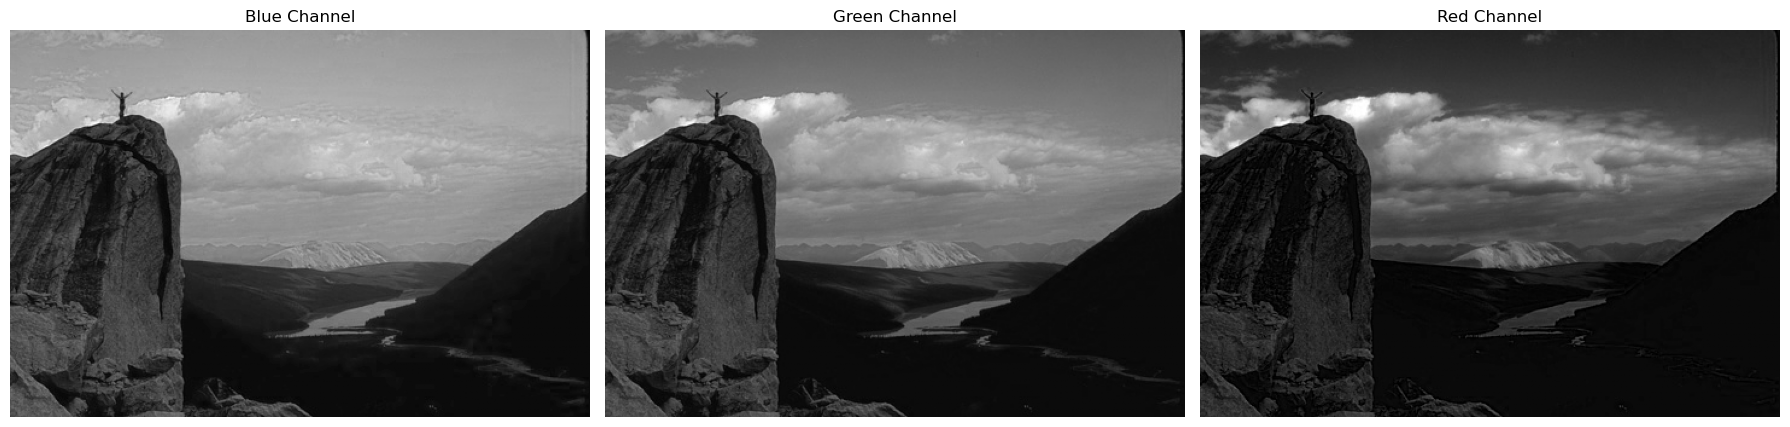

In [6]:
# Create a figure to display all channels in one row
plt.figure(figsize=(18, 6))

# Display individual color channels in a row
plt.subplot(131)
if len(blue.shape) == 2:  # Grayscale
    plt.imshow(blue, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(132)
if len(green.shape) == 2:  # Grayscale
    plt.imshow(green, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(133)
if len(red.shape) == 2:  # Grayscale
    plt.imshow(red, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Merging Color Channels**

- To merge or combine individual channels into a complete color image, you can use OpenCV's `cv2.merge()` function. This function takes a list of 2D arrays (channels) and combines them into a multi-channel image.

- **The `cv2.merge()` works:**
    - It takes a list of channels (like [B, G, R])
    - Each channel is a 2D array (just like a grayscale image)
    - It combines these channels to create a color image
    - All channels must have the same height and width

In [7]:
# Create a zero matrix with same dimensions as original image channels
zeros = np.zeros(img.shape[:2], dtype="uint8")
print(zeros.shape)
print(red.shape)

(321, 481)
(321, 481)


In [8]:
# Create color-isolated images by merging channels with zeros
red_isolated = cv2.merge([zeros, zeros, red])     # BGR format: (0,0,red)
green_isolated = cv2.merge([zeros, green, zeros]) # BGR format: (0,green,0)
blue_isolated = cv2.merge([zeros, blue, zeros])   # BGR format: (blue,0,0)
print(red_isolated.shape)
print(green_isolated.shape)
print(blue_isolated.shape)

(321, 481, 3)
(321, 481, 3)
(321, 481, 3)


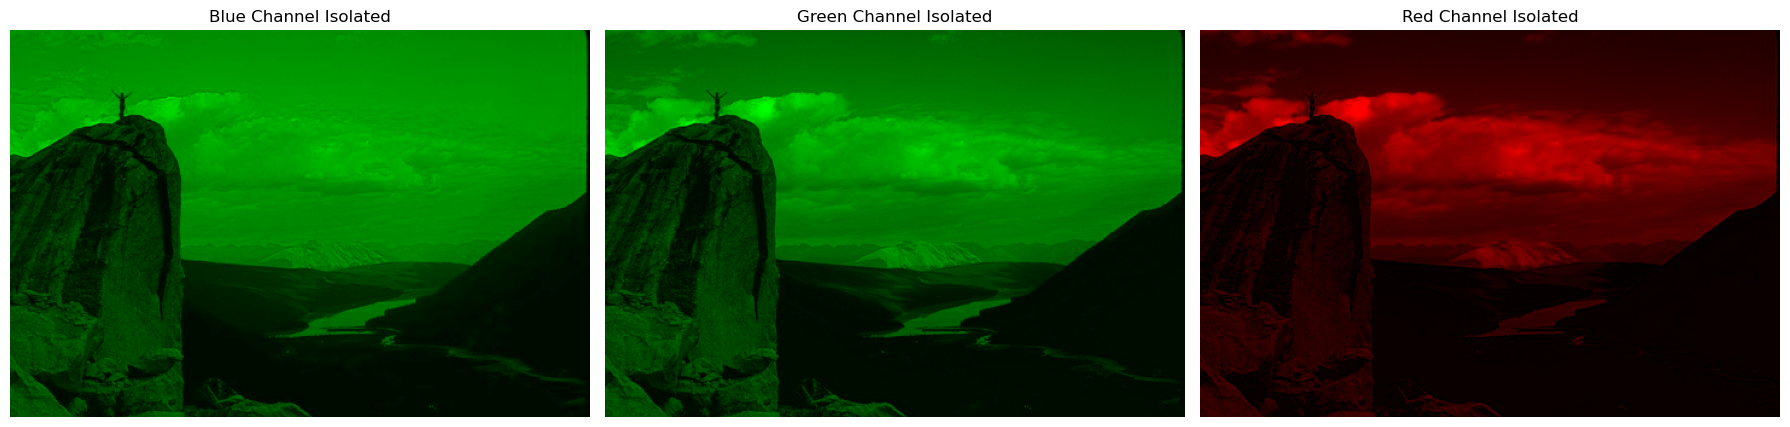

In [9]:
# Display each isolated color channel
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(blue_isolated, cv2.COLOR_BGR2RGB))
plt.title('Blue Channel Isolated')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(green_isolated, cv2.COLOR_BGR2RGB))
plt.title('Green Channel Isolated')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(red_isolated, cv2.COLOR_BGR2RGB))
plt.title('Red Channel Isolated')
plt.axis('off')

plt.tight_layout()
plt.show()

### Merging the Channels Back

In [10]:
# Merging split channels back into the original image
merged_img = cv2.merge([blue, green, red])

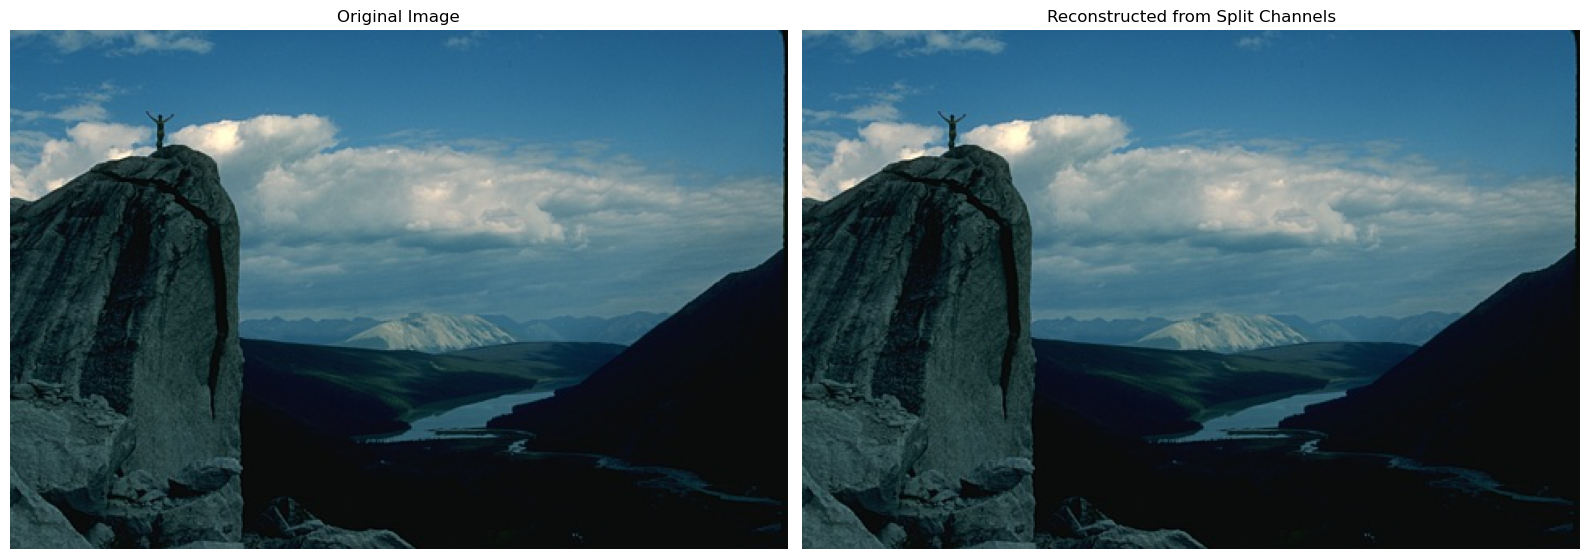

In [11]:
# Display the original and reconstructed images side by side
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(merged_img, cv2.COLOR_BGR2RGB))
plt.title('Reconstructed from Split Channels')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Verifying Image Reconstruction**

To check if our split and merge operations preserved the original image perfectly, we can use `cv2.subtract()` to find the differences between images. This function:

* Takes two images of the same size and type
* Subtracts the second image from the first, pixel by pixel
* Returns a new image showing the differences

When we sum all values in the difference image using `np.sum()`, a result of 0 confirms that our reconstruction is identical to the original. This verification step is important when processing images to ensure we haven't lost or altered any information.

The concept is similar to checking if A - B = 0, which would prove that A = B.

In [12]:
# Verify that the images are identical
difference = cv2.subtract(img, merged_img)
print(f"Sum of differences between original and reconstructed: {np.sum(difference)}")
print("Note: A sum of 0 confirms perfect reconstruction")

Sum of differences between original and reconstructed: 0
Note: A sum of 0 confirms perfect reconstruction


### Color Channel Manipulation

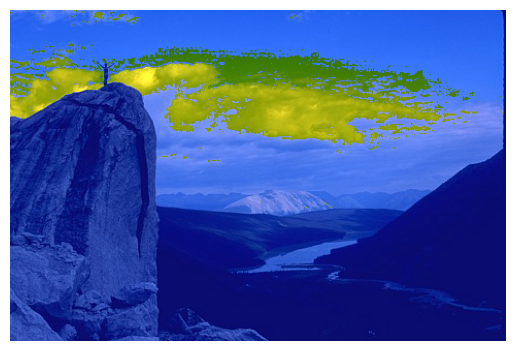

In [13]:
# Extract the original channels
B, G, R = cv2.split(img)

# Add 100 to blue channel with proper clipping
merged = cv2.merge([np.clip(B+100, 0, 255).astype(np.uint8), G, R])

# Convert BGR to RGB for matplotlib display
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

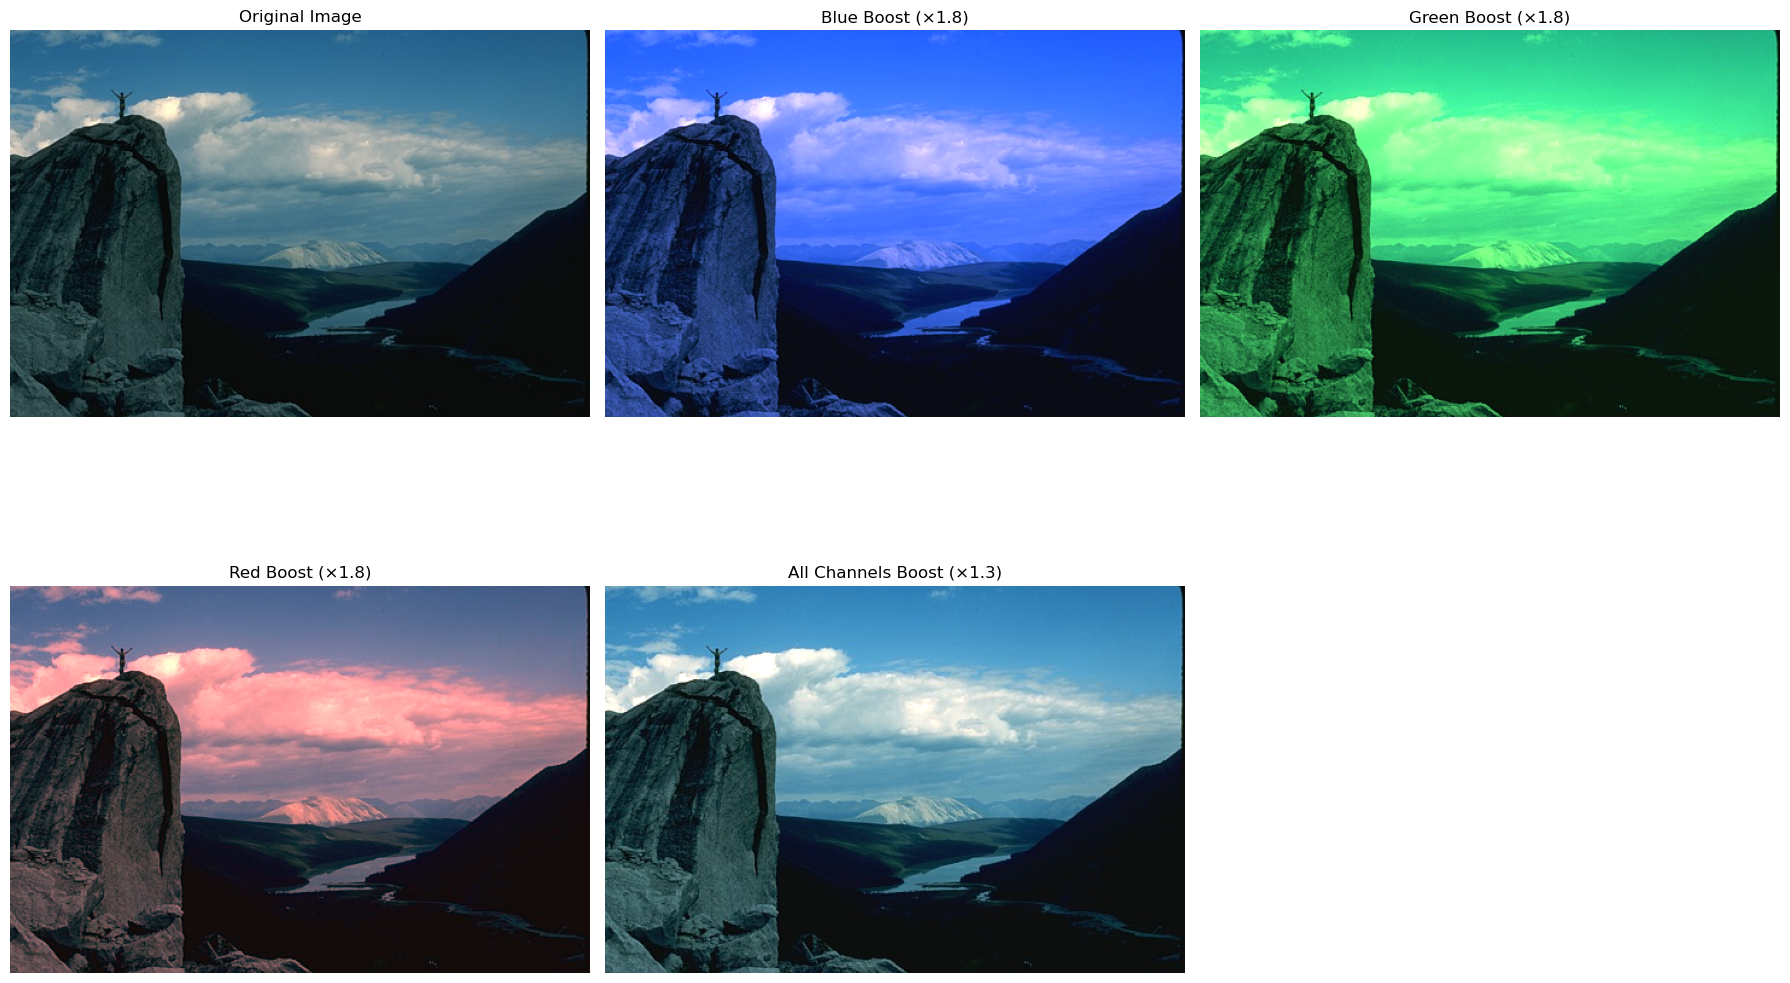

In [14]:
# Create channel-boosted images using multiplication
enhancement_factor = 1.95  # 80% increase

blue_boost = cv2.merge([np.clip(B * enhancement_factor, 0, 255).astype(np.uint8), G, R])
green_boost = cv2.merge([B, np.clip(G * enhancement_factor, 0, 255).astype(np.uint8), R])
red_boost = cv2.merge([B, G, np.clip(R * enhancement_factor, 0, 255).astype(np.uint8)])
all_boost = cv2.merge([
    np.clip(B * 1.3, 0, 255).astype(np.uint8),
    np.clip(G * 1.3, 0, 255).astype(np.uint8),
    np.clip(R * 1.3, 0, 255).astype(np.uint8)
])

# Display images in a grid
plt.figure(figsize=(18, 12))

# Original image
plt.subplot(231)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Blue boost
plt.subplot(232)
plt.imshow(cv2.cvtColor(blue_boost, cv2.COLOR_BGR2RGB))
plt.title('Blue Boost (×1.8)')
plt.axis('off')

# Green boost
plt.subplot(233)
plt.imshow(cv2.cvtColor(green_boost, cv2.COLOR_BGR2RGB))
plt.title('Green Boost (×1.8)')
plt.axis('off')

# Red boost
plt.subplot(234)
plt.imshow(cv2.cvtColor(red_boost, cv2.COLOR_BGR2RGB))
plt.title('Red Boost (×1.8)')
plt.axis('off')

# All channels boost
plt.subplot(235)
plt.imshow(cv2.cvtColor(all_boost, cv2.COLOR_BGR2RGB))
plt.title('All Channels Boost (×1.3)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Add educational comment
print("Note how increasing different channels affects the color balance of the image.")
print("Increasing blue adds a cool tone, increasing red adds warmth, and increasing all channels brightens the entire image.")

Note how increasing different channels affects the color balance of the image.
Increasing blue adds a cool tone, increasing red adds warmth, and increasing all channels brightens the entire image.


### **The HSV Color Space**

![HSV Color Cone](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

The HSV (Hue, Saturation, Value) color space represents colors in a way that's more intuitive for human perception than RGB. While RGB mixes three primary colors, HSV separates color information (hue) from intensity (value) and purity (saturation).

**Components of HSV:**

- **Hue (H)**: Represents the color type as an angle around the color wheel
  - Range in OpenCV: 0-179 
  - Example values: 0° = red, 60° = yellow, 120° = green, 240° = blue

- **Saturation (S)**: Represents color purity or intensity
  - Range: 0-255
  - 0 = grayscale (no color), 255 = fully saturated (pure color)

- **Value (V)**: Represents brightness
  - Range: 0-255
  - 0 = black, 255 = maximum brightness

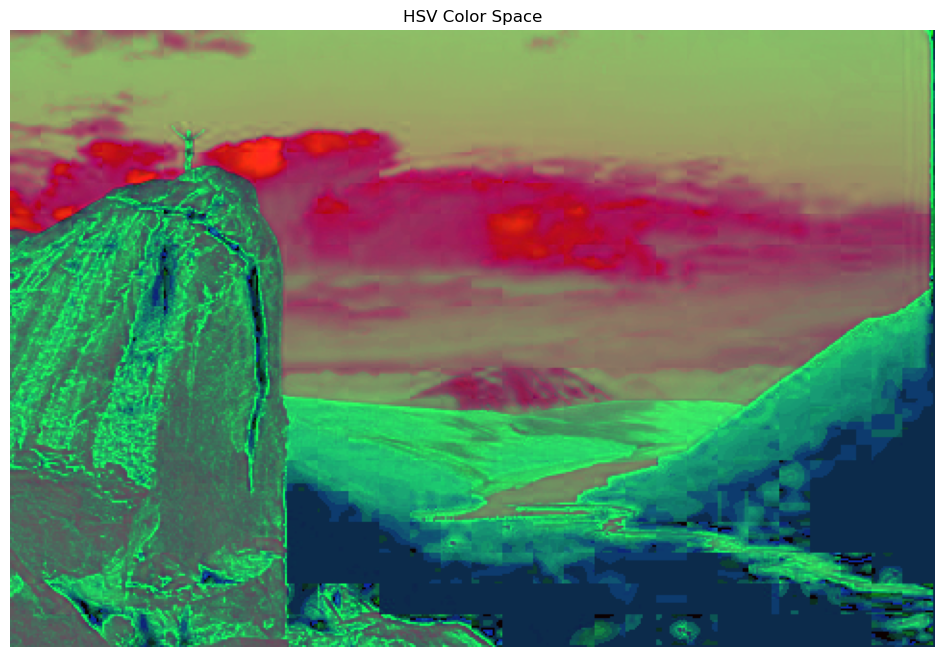

In [16]:
# Convert from BGR to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split HSV into individual channels
h, s, v = cv2.split(hsv_img)

# Display the HSV image
display_image(hsv_img, title="HSV Color Space")

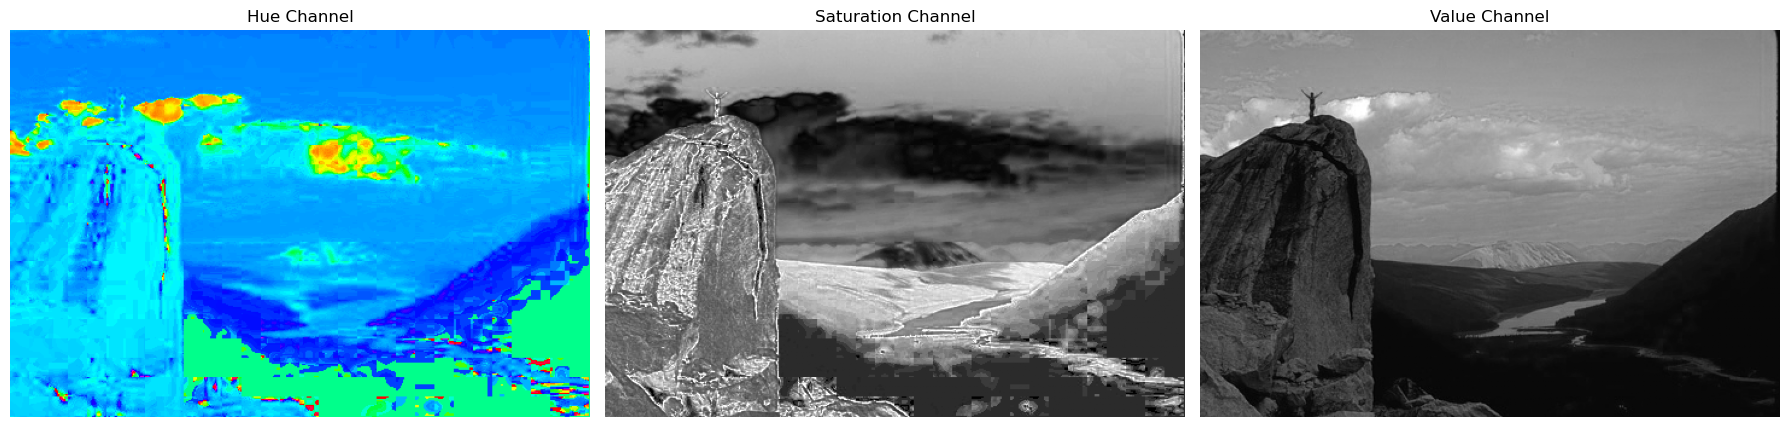

HSV Color Space Components:
- Hue: Color type (0-179 in OpenCV)
- Saturation: Color intensity/purity (0-255)
- Value: Brightness (0-255)


In [17]:
# Display individual HSV channels
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(h, cmap='hsv')  # Special colormap for hue
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(v, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# Add explanation of HSV components
print("HSV Color Space Components:")
print("- Hue: Color type (0-179 in OpenCV)")
print("- Saturation: Color intensity/purity (0-255)")
print("- Value: Brightness (0-255)")